##### K-Networks (K-Nets)
In this notebook we will perform simulations on artificial datasets to review the basic operational parameters of K-Nets, an exemplar-based clustering algorithm. <br>

Load some modules requested for displaying and handling and input and output for this notebook.<br>

In [1]:
import numpy as np                              # numerical computations
import matplotlib.pyplot as plt                 # plotting
from sklearn.metrics import pairwise_distances  # calculate similarity matrices

Load modules for K-Nets

In [2]:
import knet  # K-Nets module
import aknet  # a module for detecting ANNs through K-Nets


Load 2d datasets for parameter tuning illustration.<br>

In [3]:
data2d = np.load('data//Knets_2d_datasets.npz')

X10000 = data2d['X10000']  # 100000 points / 10000 clusters
X100 = data2d['X100']      # 100000 points / 100 clusters
X50 = data2d['X50']        # 7500 points / 50 clusters
X31 = data2d['X31']        # 3150 points / 100 clusters

SM31 = pairwise_distances(X31) # Calculate Similarities of Pattern matrix
SM50 = pairwise_distances(X50)

Clustering resolution (i.e. number of extracted clusters) in K-Nets is controlled through the integer parameter k indicating the k NNs of every sample. <br><br>
The range of k is from 1 to ~N/2 (N: number of samples), under which K-Nets partitions the dataset into C = N to C = 1 clusters respectively. <br>
Hence the smaller the value of k the larger the number of extracted clusters.<br>

K-Nets can accept data input in the form of: pattern matrix (PM) or similarity matrix (SM). <br>

In [4]:
idx, kns = knet.train(X31, k=5)
exemplars = np.unique(idx)
print('Number of exemplars: ', np.shape(exemplars))

idx, kns = knet.train(SM31, k=6, sims=1)  # if SM is provided as input turn sims on
exemplars = np.unique(idx)
print('Number of exemplars: ', np.shape(exemplars))

Number of exemplars:  (453,)
Number of exemplars:  (368,)


K-Nets attempts to find stable data configurations to enhcance data analysis. Hence especially in cases of large data dimensionality as seen in the last <br> 
example above, it wont output every possible partition for the various k values.<br><br>
To get any intermediate partition we activate Exact Operational Mode (EOM) by providing as input to K-Net, along with the k value, the number of requested clusters<br>
into parameter c.<br><br>
It is beneficial (i.e. not obligatory) the k value under EOM to be "near" the number of requested clusters.

In [5]:
idx, kns = knet.train(SM31, k=6, c=400, sims=1)
exemplars = np.unique(idx)
print('Number of exemplars: ', np.shape(exemplars))

Number of exemplars:  (400,)


If we want a specific number of clusters C, a starting point <br><br>
for k could be to set: k = (N/2) / C   <br><br>
(N: number of samples in the dataset). <br><br>

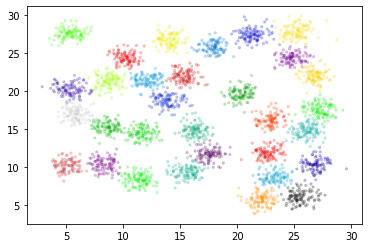

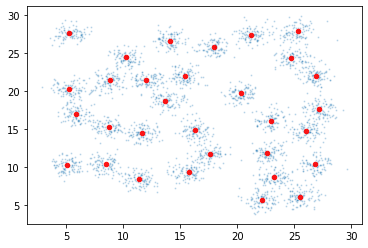

In [6]:
idx, _ = knet.train(X31, k=50)  # k = (3100/2) / 31 --> k = 50
exemplars = np.unique(idx)


# Plot the partition
plt.scatter(X31[:,0], X31[:, 1], c=idx, s=5, alpha=0.2, cmap='nipy_spectral')
plt.show()

# Plot the exemplars
plt.scatter(X31[:,0], X31[:, 1], s=1, alpha=0.2, cmap='nipy_spectral')
plt.scatter(X31[exemplars,0], X31[exemplars, 1], c='red', s=20, alpha=0.9, cmap='nipy_spectral')
plt.show()

The stability of the data configuration for 31 clusters in this artificial dataset drives K-Nets to extract the same number of clusters for <br>
a large range of k values (42 <= k <= 91).<br><br>
The partitions however for all values are identical.<br>

In [7]:
idx, _ = knet.train(SM31, k=42, sims=1)  # when utilizing SM turn on sims switch
exemplars = np.unique(idx)
print('Exemplars for k=42:', exemplars)

idx, _ = knet.train(SM31, k=91, sims=1)
exemplars = np.unique(idx)
print('Exemplars for k=91:', exemplars)

Exemplars for k=42: [  74  188  292  393  484  512  688  714  837  963 1024 1173 1290 1304
 1444 1554 1677 1797 1820 1930 2006 2181 2253 2314 2492 2576 2692 2735
 2886 2972 3089]
Exemplars for k=91: [  74  188  292  393  484  512  688  714  837  963 1024 1173 1290 1304
 1444 1554 1677 1797 1820 1930 2006 2181 2253 2314 2492 2576 2692 2735
 2886 2972 3089]


Schemes such as these (the same number of clusters for a large range of k values) <br>
are usual in small degrees of clustering resolution. <br>

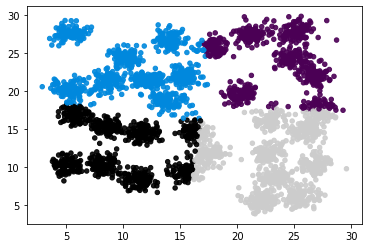

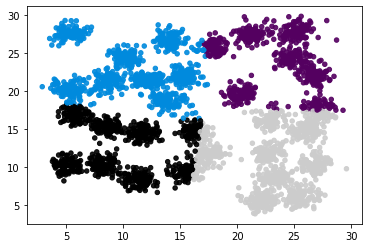

In [8]:
idx400, _ = knet.train(SM31, k=400, sims=1)
idx630, _ = knet.train(SM31, k=630, sims=1)

# Plot the partitions
plt.scatter(X31[:, 0], X31[:, 1], c=idx400, s=20, alpha=0.9, cmap='nipy_spectral')
plt.show()
plt.scatter(X31[:, 0], X31[:, 1], c=idx630, s=20, alpha=0.9, cmap='nipy_spectral')
plt.show()

This phenomenon, occurs due to the large number of samples that can be utilized as possible exemplars. <br>
<br>
We can however resolve it by utilizing the Random Sampling Value (rsv) parameter. <br>
The rsv parameter indicates the percentage or actual number of samples that will be utilized to detect the exemplars.<br>
<br>
K-Nets operation is composed of three phases. The number of exemplars is determined in the first two, while the third one is a fine tuning phase.<br>
During the first two phases the K-Nets determines the k-NNs of every sample.<br><br>
In cases however of medium to small clustering resolution K-Nets can adequetely perform its clustering operation with only a fraction of the samples.<br><br>
The value of rsv can be either a positive real number between 0 and 1 indicating the percentage of N or the actual number of random samples.<br><br>
The exact operational mode (setting the requested number of clusters in parameter c) can be utilized with rsv. <rsv>

(4,)


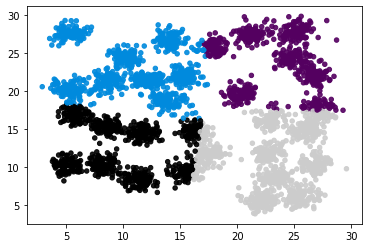

(31,)


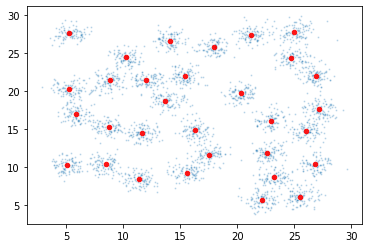

(50,)


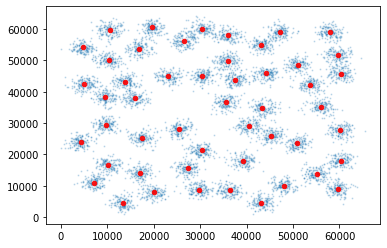

In [9]:

# Partition X31 into 4 clusters
idx, kns = knet.train(X31, k=50, c=4, rsv=0.1)
exemplars = np.unique(idx)


print(np.shape(exemplars))

# Plot the partition
plt.scatter(X31[:, 0], X31[:, 1], c=idx630, s=20, alpha=0.9, cmap='nipy_spectral')
plt.show()

# Partition X31 into 31 clusters
idx, kns = knet.train(X31, k=14, c=31,  rsv=0.2)
exemplars = np.unique(idx)

print(np.shape(exemplars))
# Plot the exemplars
plt.scatter(X31[:,0], X31[:, 1], s=1, alpha=0.2, cmap='nipy_spectral')
plt.scatter(X31[exemplars,0], X31[exemplars, 1], c='red', s=20, alpha=0.9, cmap='nipy_spectral')
plt.show()

# Partition X50 into 50 clusters through its Similarity Matrix
idx, kns = knet.train(SM50, k=30, c=50,  rsv=2500, sims=1)
exemplars = np.unique(idx)

print(np.shape(exemplars))
# Plot the exemplars
plt.scatter(X50[:,0], X50[:, 1], s=1, alpha=0.2, cmap='nipy_spectral')
plt.scatter(X50[exemplars,0], X50[exemplars, 1], c='red', s=20, alpha=0.9, cmap='nipy_spectral')
plt.show()

Based on the initial K-Nets solution, determined through the first two K-Nets phases (Construction & Selection) the number of <br>
iterations requested for convergence during the last (Assignment) phase is relatively small, in most of the cases. <br>
<br>
The number of iterations can be set through the parameter iters.<br>

(100,)


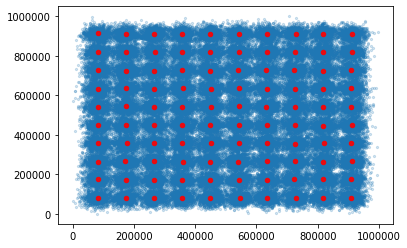

In [10]:
#  Partition X100 into 100 clusters
idx, kns = knet.train(X100, k=35, c=100, rsv=6000, iters=3)  # set the number of iterations
exemplars = np.unique(idx)

print(np.shape(exemplars))  # number of exemplars

# Plot the dataset and the exemplars
plt.scatter(X100[:,0], X100[:, 1], s=5, alpha=0.2, cmap='nipy_spectral')
plt.scatter(X100[exemplars, 0], X100[exemplars, 1], c='red', s=20, alpha=0.9, cmap='nipy_spectral')
plt.show()

The assignment phase accepts as input the exemplars determined through the first two phases. It then follows a round of iterations that is trying refine <br>
the input exemplar set. <br>
<br>
K-Nets looks for the new exemplar of every cluster only though a number of NNs among its members. <br>
We can control this number through the parameter ENM (Exemplars Nearest Members). <br>
<br>

(4,)


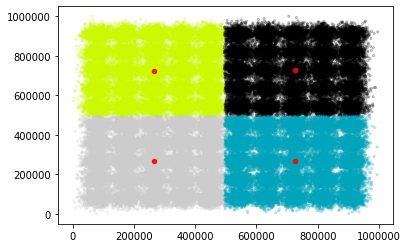

In [11]:
#  In most occasions a very-small number of iterations will suffice.

idx, kns = knet.train(X100, k=150, c=4, rsv=1000, ENM=500)  # ENM default is 50
exemplars = np.unique(idx)

print(np.shape(exemplars))  # number of exemplars

# Plot the dataset and the exemplars
tc=np.zeros((np.shape(X100)[0]))
s=0
for ex in exemplars:
    tc[idx==ex]=s
    s+=100

plt.scatter(X100[:,0], X100[:, 1], c=tc, s=5, alpha=0.2, cmap='nipy_spectral')
plt.scatter(X100[exemplars, 0], X100[exemplars, 1], c='red', s=20, alpha=0.9, cmap='nipy_spectral')
plt.show()

K-Nets can accept data in the form of a sparse similarity matrix (SSM). SSM is composed of two matrices. The first indicates the NNs of every sample and the other the <br> corresponding distances. <br>
<br>
We can utilize the aknet module to detect approximate NNs (ANNs). To detect ANNs through aknet we use aknet.train and aknet.knets4anns. Function aknet.train accepts as<br> input the pattern matrix of the dataset and a list k, and operates as follows: Utilizes K-Nets to partition a random sample of the dataset into a number of clusters <br> based on the first value of list k. The size of the random sample can be controlled through parameter thres (default thres=2000). <br>
Subsequently assigns every sample of the original dataset to partitions a random subset of the dataset int a randomly selected subset of the dataset into a number of <br> clusters based on the k value. <br>
<br>

Percentage changed:  0.99467 99467
(10000,)


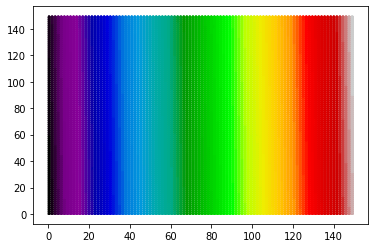

In [12]:
prior = aknet.train(X10000, k=[10, 20])
[NNs, DNNs] = aknet.knets4anns(X10000, 50, prior, enn=0.25)
idx, _ = knet.train([NNs, DNNs], k=7, iters=1)  # SSM as data input
exemplars = np.unique(idx)
print(np.shape(exemplars))

# Plotting
plt.scatter(X10000[:, 0], X10000[:, 1], c=idx[0], s=1, alpha=0.9, cmap='nipy_spectral')
plt.show()

To be continued...